In [1]:
from hossam import load_data
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
import seaborn as sb
import numpy as np
from pandas import DataFrame
from statsmodels.tsa.stattools import adfuller

from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
my_dpi = 200
font_path = "../data_visualization/NotoSansKR-Regular.ttf"
fm.fontManager.addfont(font_path)
font_prop = fm.FontProperties(fname=font_path)
font_name = font_prop.get_name()
my_font_name = "Noto Sans KR"
my_theme = "dark"

sb.set_theme(style=my_theme)
plt.rcParams['font.family'] = my_font_name
plt.rcParams['font.size'] = 10
plt.rcParams['axes.unicode_minus'] = False

In [3]:
origin = load_data('air_passengers')

print("\n===== 데이터 크기 확인 =====")
print(f"데이터셋 크기 : {origin.shape}")
print(f"열 개수: {origin.shape[1]}")
print(f"행 개수: {origin.shape[0]}")

print("\n===== 데이터 타입 확인 =====")
print(origin.info())

origin.head()

[data] https://data.hossam.kr/data/lab13_/air_passengers.xlsx
[desc] 어느 항공사의 월간 탑승객 수 (출처: https://www.kaggle.com/datasets/rakannimer/air-passengers)
[!] Cannot read metadata

===== 데이터 크기 확인 =====
데이터셋 크기 : (144, 2)
열 개수: 2
행 개수: 144

===== 데이터 타입 확인 =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       144 non-null    datetime64[ns]
 1   Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB
None


,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [4]:
df1 = origin.set_index('Month')
df1.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


===== 0차 차분 =====


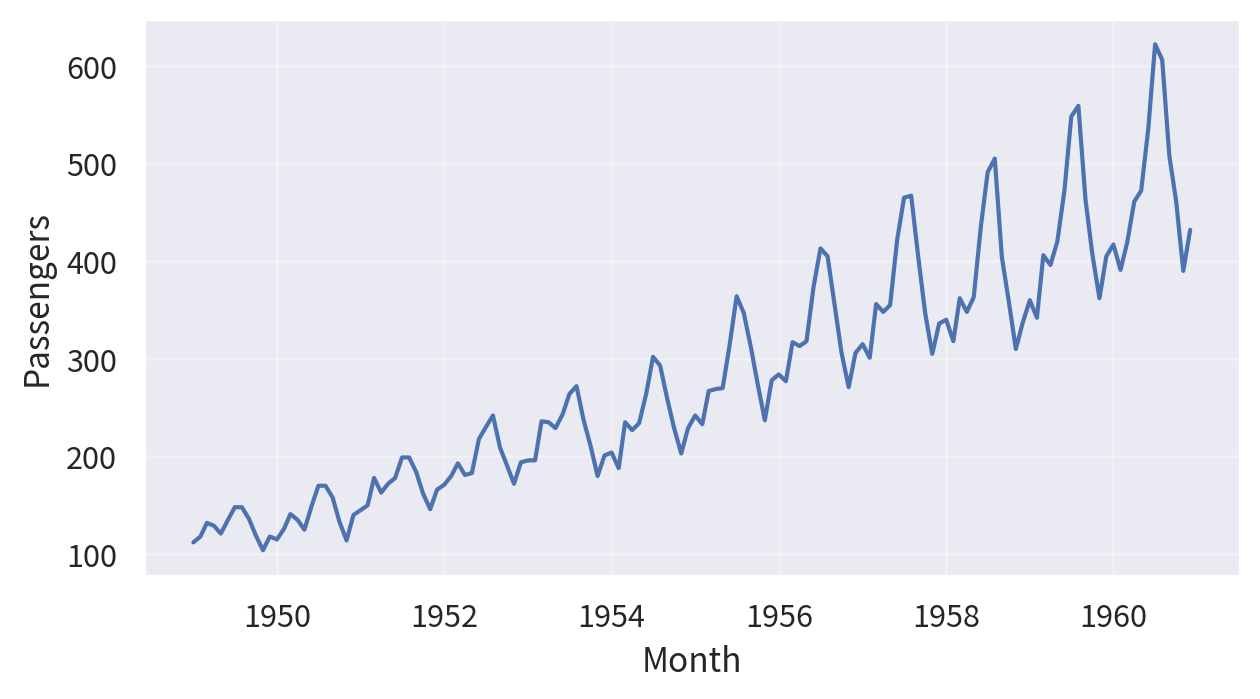

,0
ADF Statistic,0.815369
p-value,0.99188
num of lags,13
num of observations,130
result,False


===== 1차 차분 =====


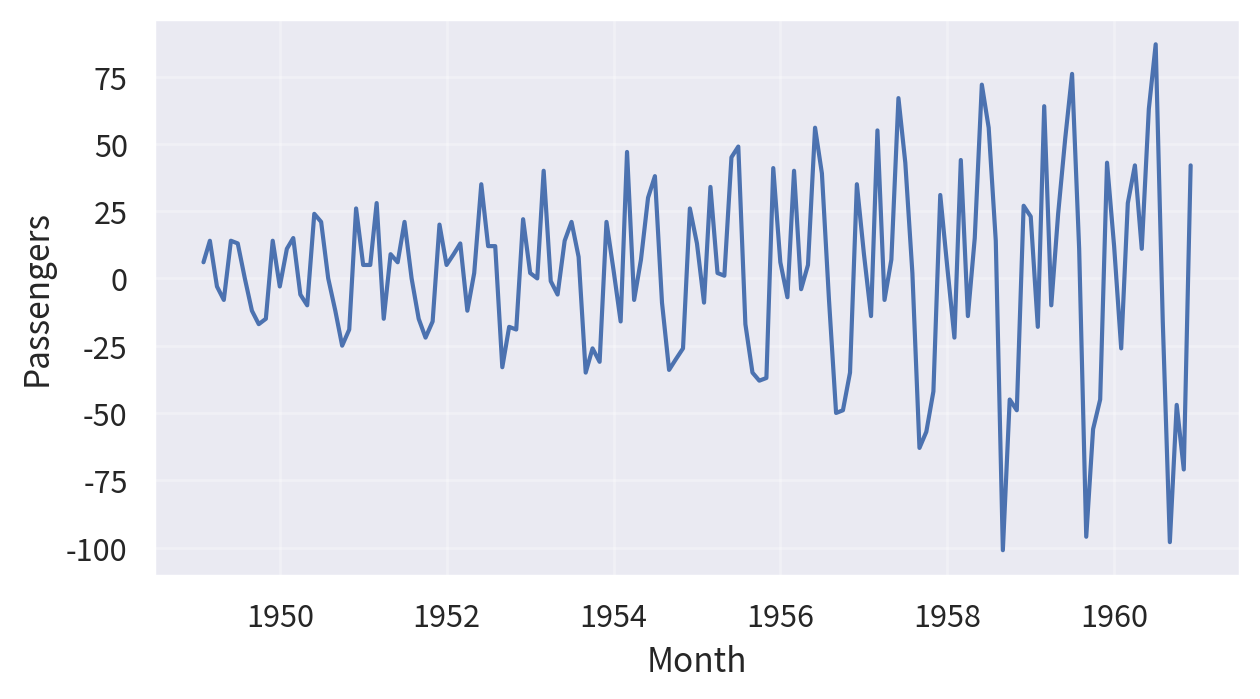

,0
ADF Statistic,-2.829267
p-value,0.054213
num of lags,12
num of observations,130
result,False


===== 2차 차분 =====


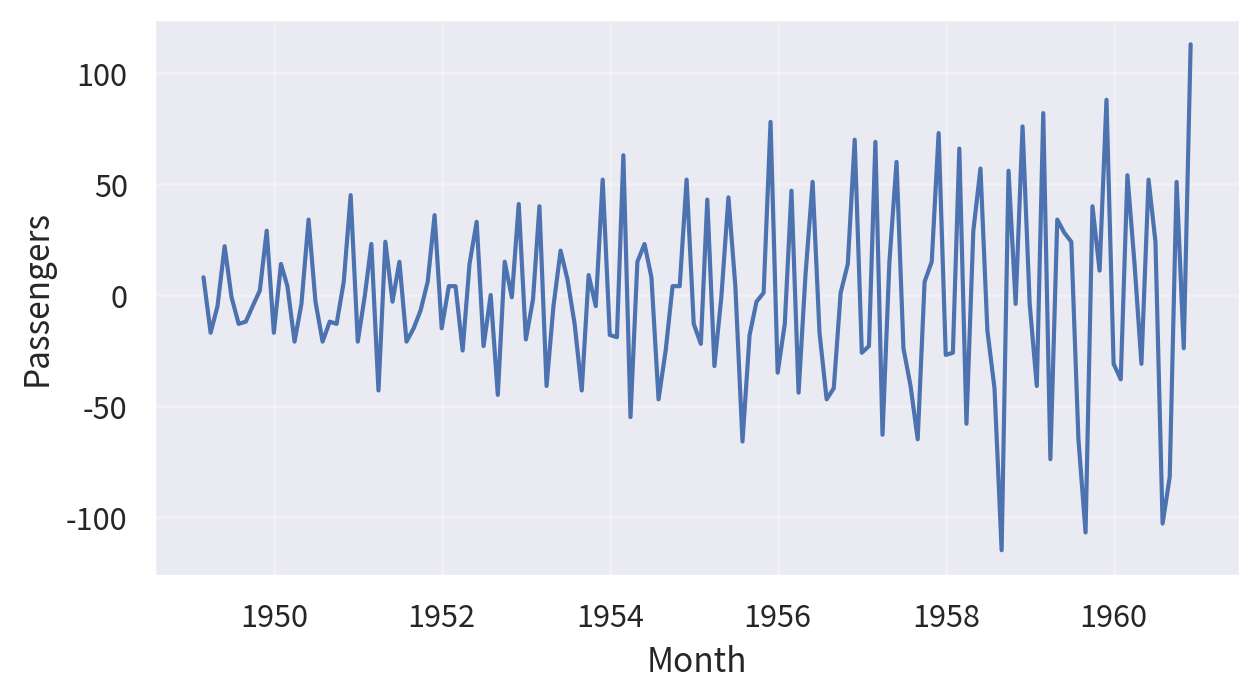

,0
ADF Statistic,-16.384232
p-value,0.0
num of lags,11
num of observations,130
result,True


In [5]:
diff_df = df1.copy()
yname = 'Passengers'
count = 0

while True:
    print(f"===== {count}차 차분 =====")
    # 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
    width_px = 1280             #그래프 가로 크기
    height_px = 720             #그래프 세로 크기
    rows = 1                    #도화지의 행 수
    cols = 1                    #도화지의 열 수
    figsize = (width_px / my_dpi, height_px / my_dpi)
    fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)
    
    sb.lineplot(data=diff_df, x=diff_df.index, y=yname)
    ax.grid(True, alpha=0.3)
    
    # 4) 출력
    plt.tight_layout()                      #여백 제거
    # plt.savefig("myplot.png", dpi=my_dpi)   #생략 가능
    plt.show()                              #그래프 화면 출력
    plt.close()                             #그래프 작업 종료

    ar=adfuller(diff_df[yname])
    ar_dict={
        'ADF Statistic' : ar[0],
        'p-value' : ar[1],
        'num of lags' : ar[2],
        'num of observations' : ar[3],
    }

    ar_dict['result'] = True if ar[1] <= 0.05 else False

    adf = DataFrame([ar_dict]).T
    display(adf)

    if ar[1] <=0.05:
        break

    count+=1
    diff_df = diff_df.diff().dropna()
    

평균이동법

In [6]:
df2 = df1.copy()

df2['rolling3'] = df2['Passengers'].rolling(3).mean()
df2['rolling6'] = df2['Passengers'].rolling(6).mean()
df2['rolling9'] = df2['Passengers'].rolling(9).mean()
df2.head(10)

,Passengers,rolling3,rolling6,rolling9
Month,,,,
1949-01-01,112,NaN,NaN,NaN
1949-02-01,118,NaN,NaN,NaN
1949-03-01,132,120.666667,NaN,NaN
1949-04-01,129,126.333333,NaN,NaN
1949-05-01,121,127.333333,NaN,NaN
1949-06-01,135,128.333333,124.500000,NaN
1949-07-01,148,134.666667,130.500000,NaN
1949-08-01,148,143.666667,135.500000,NaN
1949-09-01,136,144.000000,136.166667,131.000000


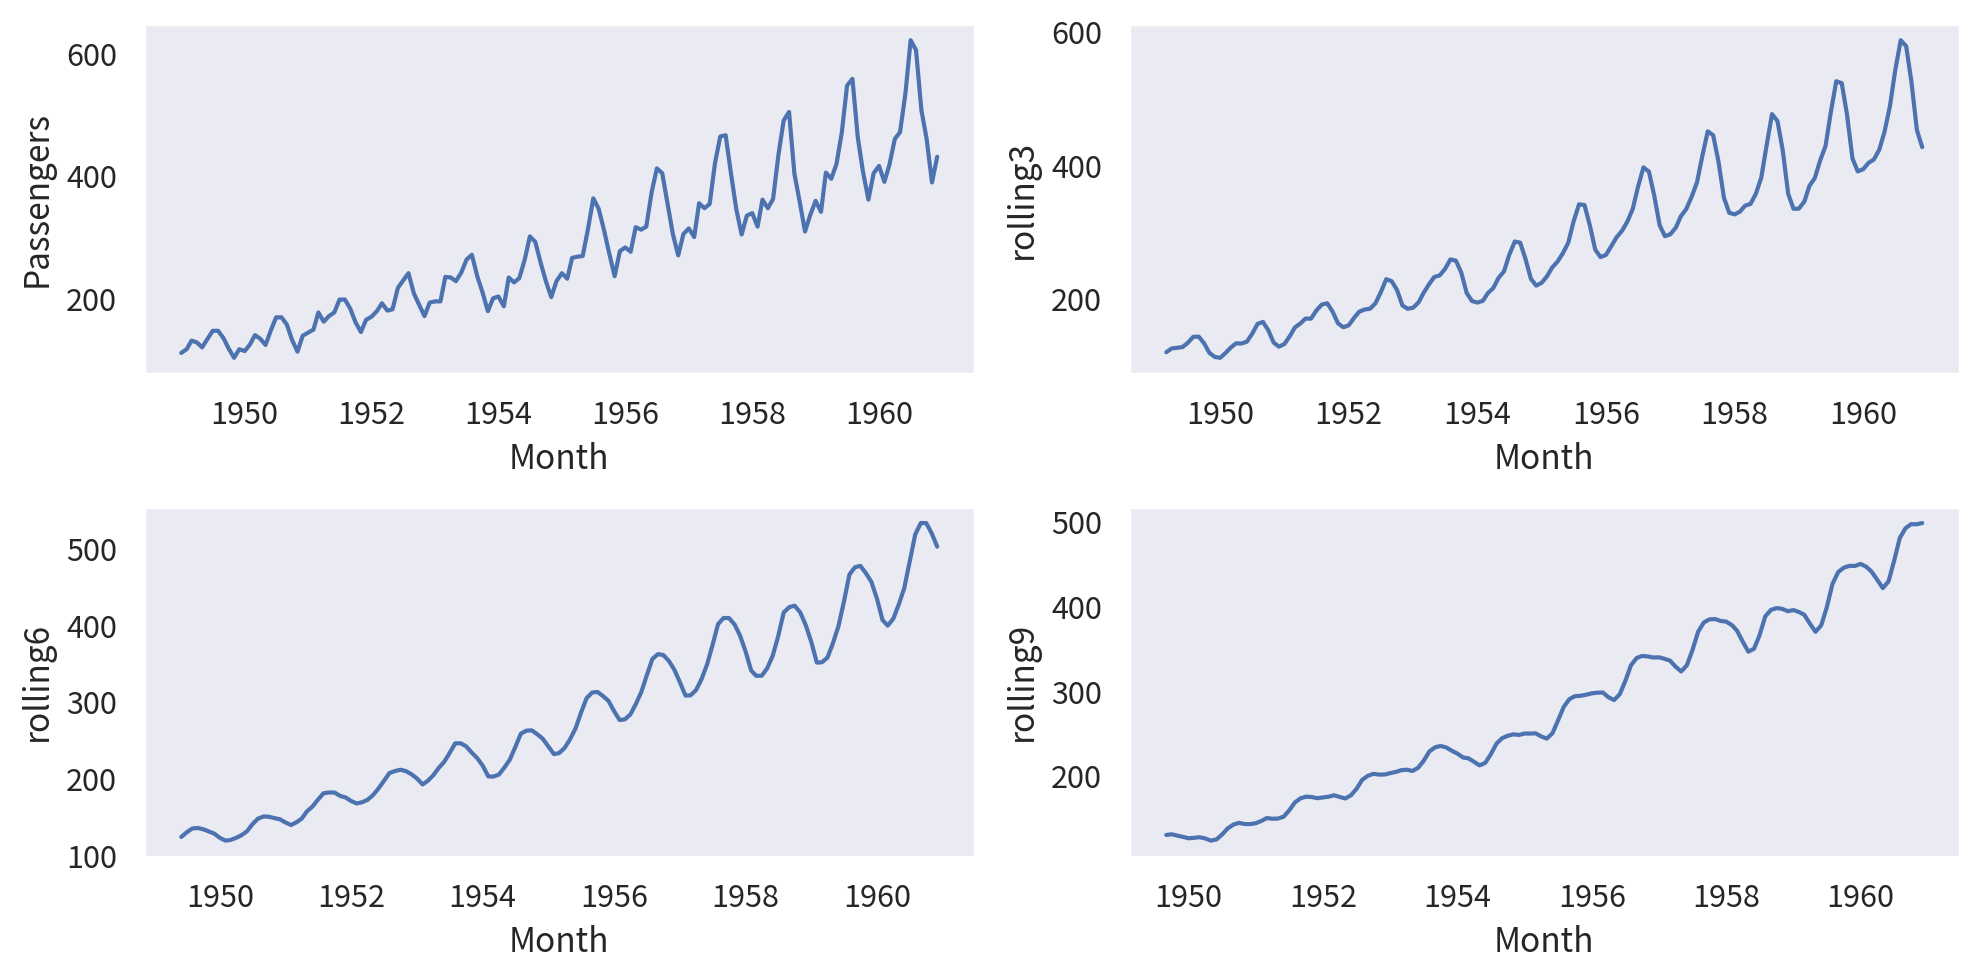

In [9]:
# 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
width_px = 2000             #그래프 가로 크기
height_px = 1000             #그래프 세로 크기
rows = 2                    #도화지의 행 수
cols = 2                    #도화지의 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

sb.lineplot(data=df2, x=df2.index, y='Passengers', ax=ax[0][0])
sb.lineplot(data=df2, x=df2.index, y='rolling3', ax=ax[0][1])
sb.lineplot(data=df2, x=df2.index, y='rolling6', ax=ax[1][0])
sb.lineplot(data=df2, x=df2.index, y='rolling9', ax=ax[1][1])

# 4) 출력
plt.tight_layout()                      #여백 제거
# plt.savefig("myplot.png", dpi=my_dpi)   #생략 가능
plt.show()                              #그래프 화면 출력
plt.close()                             #그래프 작업 종료

In [11]:
df3 = diff_df.copy()

df3['rolling3'] = df3['Passengers'].rolling(3).mean()
df3['rolling6'] = df3['Passengers'].rolling(6).mean()
df3['rolling9'] = df3['Passengers'].rolling(9).mean()

df3.head()

,Passengers,rolling3,rolling6,rolling9
Month,,,,
1949-03-01,8.0,NaN,NaN,NaN
1949-04-01,-17.0,NaN,NaN,NaN
1949-05-01,-5.0,-4.666667,NaN,NaN
1949-06-01,22.0,0.000000,NaN,NaN
1949-07-01,-1.0,5.333333,NaN,NaN


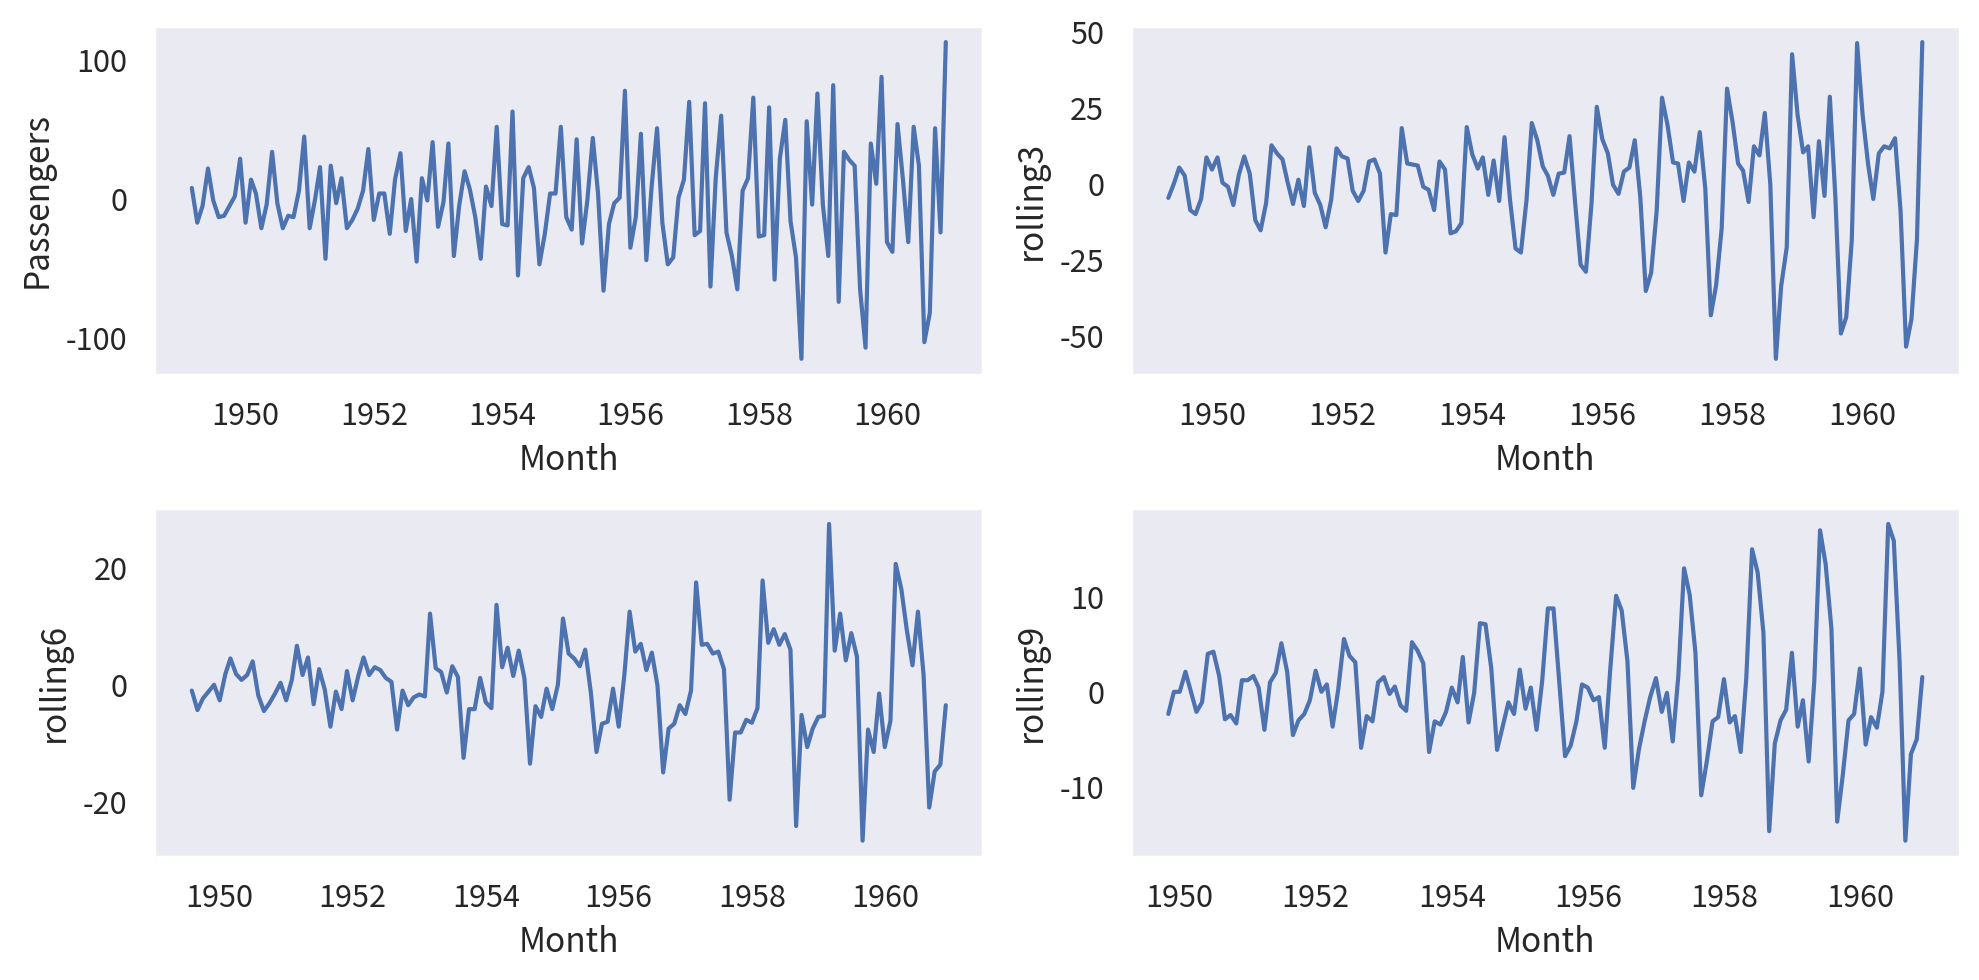

In [12]:
# 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
width_px = 2000             #그래프 가로 크기
height_px = 1000             #그래프 세로 크기
rows = 2                    #도화지의 행 수
cols = 2                    #도화지의 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

sb.lineplot(data=df3, x=df3.index, y='Passengers', ax=ax[0][0])
sb.lineplot(data=df3, x=df3.index, y='rolling3', ax=ax[0][1])
sb.lineplot(data=df3, x=df3.index, y='rolling6', ax=ax[1][0])
sb.lineplot(data=df3, x=df3.index, y='rolling9', ax=ax[1][1])

# 4) 출력
plt.tight_layout()                      #여백 제거
plt.show()                              #그래프 화면 출력
plt.close()                             #그래프 작업 종료

In [13]:
df4 = df1.copy()

df4['ewm3'] = df4['Passengers'].ewm(3).mean()
df4['ewm6'] = df4['Passengers'].ewm(6).mean()
df4['ewm9'] = df4['Passengers'].ewm(9).mean()
df4.head()

,Passengers,ewm3,ewm6,ewm9
Month,,,,
1949-01-01,112,112.000000,112.000000,112.000000
1949-02-01,118,115.428571,115.230769,115.157895
1949-03-01,132,122.594595,121.700787,121.372694
1949-04-01,129,124.937143,123.966516,123.590579
1949-05-01,121,123.646607,123.177832,122.957974


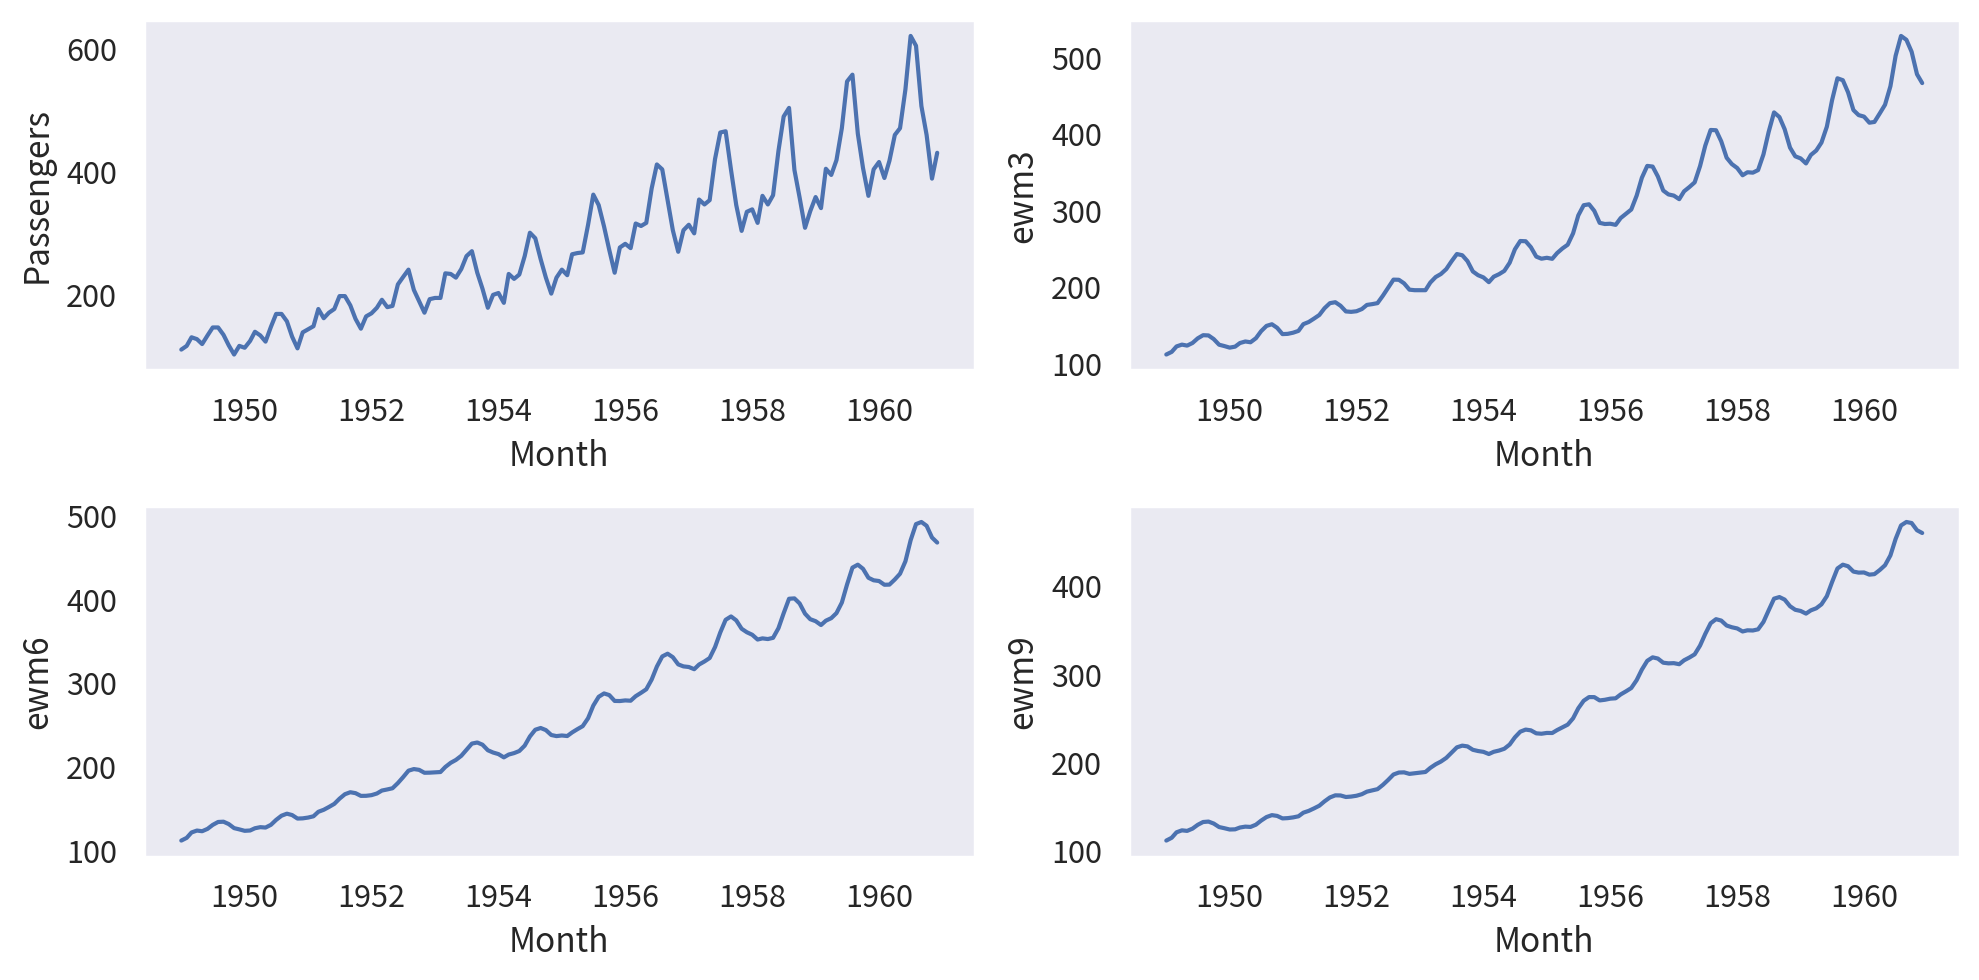

In [14]:
# 1) 그래프 초기화 (캔버스(fig)와 도화지(ax) 준비하기)
width_px = 2000             #그래프 가로 크기
height_px = 1000             #그래프 세로 크기
rows = 2                    #도화지의 행 수
cols = 2                    #도화지의 열 수
figsize = (width_px / my_dpi, height_px / my_dpi)
fig, ax = plt.subplots(rows, cols, figsize = figsize, dpi = my_dpi)

sb.lineplot(data=df4, x=df4.index, y='Passengers', ax=ax[0][0])
sb.lineplot(data=df4, x=df4.index, y='ewm3', ax=ax[0][1])
sb.lineplot(data=df4, x=df4.index, y='ewm6', ax=ax[1][0])
sb.lineplot(data=df4, x=df4.index, y='ewm9', ax=ax[1][1])

# 4) 출력
plt.tight_layout()                      #여백 제거
plt.show()                              #그래프 화면 출력
plt.close()                             #그래프 작업 종료

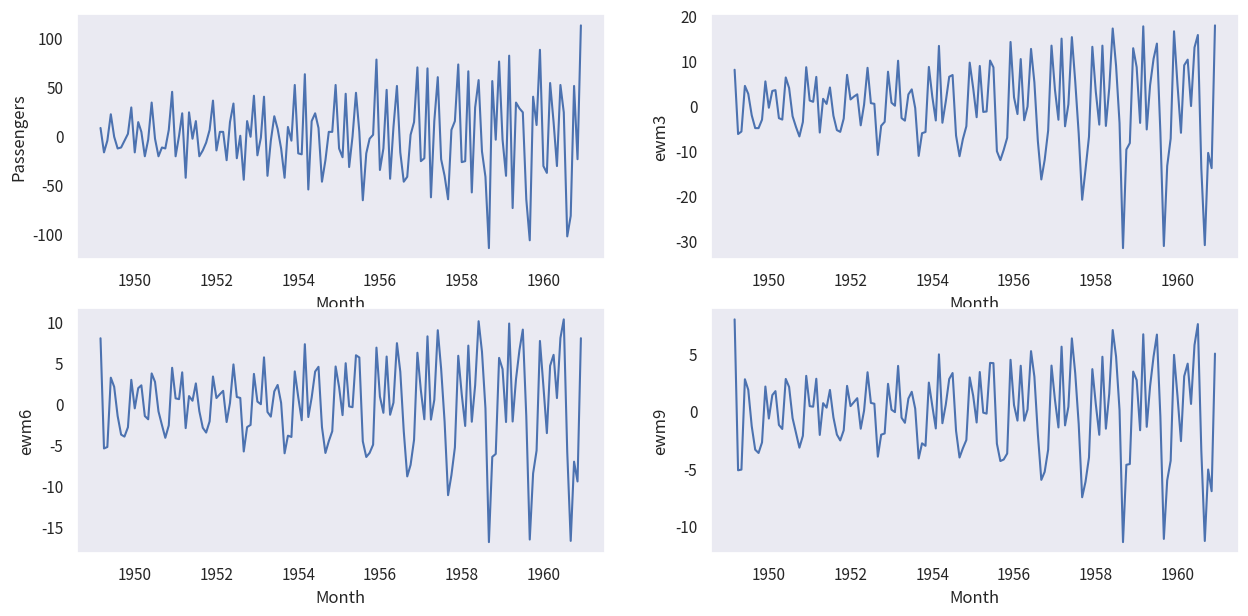

In [18]:
diff_df['ewm3'] = diff_df['Passengers'].ewm(3).mean()
diff_df['ewm6'] = diff_df['Passengers'].ewm(6).mean()
diff_df['ewm9'] = diff_df['Passengers'].ewm(9).mean()

fig , ax = plt.subplots(2,2, figsize=(15,7))

sb.lineplot(data=diff_df, x=diff_df.index, y='Passengers', ax=ax[0][0])
sb.lineplot(data=diff_df, x=diff_df.index, y='ewm3', ax=ax[0][1])
sb.lineplot(data=diff_df, x=diff_df.index, y='ewm6', ax=ax[1][0])
sb.lineplot(data=diff_df, x=diff_df.index, y='ewm9', ax=ax[1][1])

plt.show()
plt.close()

분해 시계열

In [19]:
model_name = 'multiplicative'

sd = seasonal_decompose(df1['Passengers'], model=model_name)

sd_df = DataFrame({
    'original': sd.observed,
    'trend': sd.trend,
    'seasonal': sd.seasonal,
    'resid': sd.resid
}, index=origin.index)

sd_df

,original,trend,seasonal,resid
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
139,NaN,NaN,NaN,NaN
140,NaN,NaN,NaN,NaN
141,NaN,NaN,NaN,NaN
142,NaN,NaN,NaN,NaN


이걸로는 알 수 없음

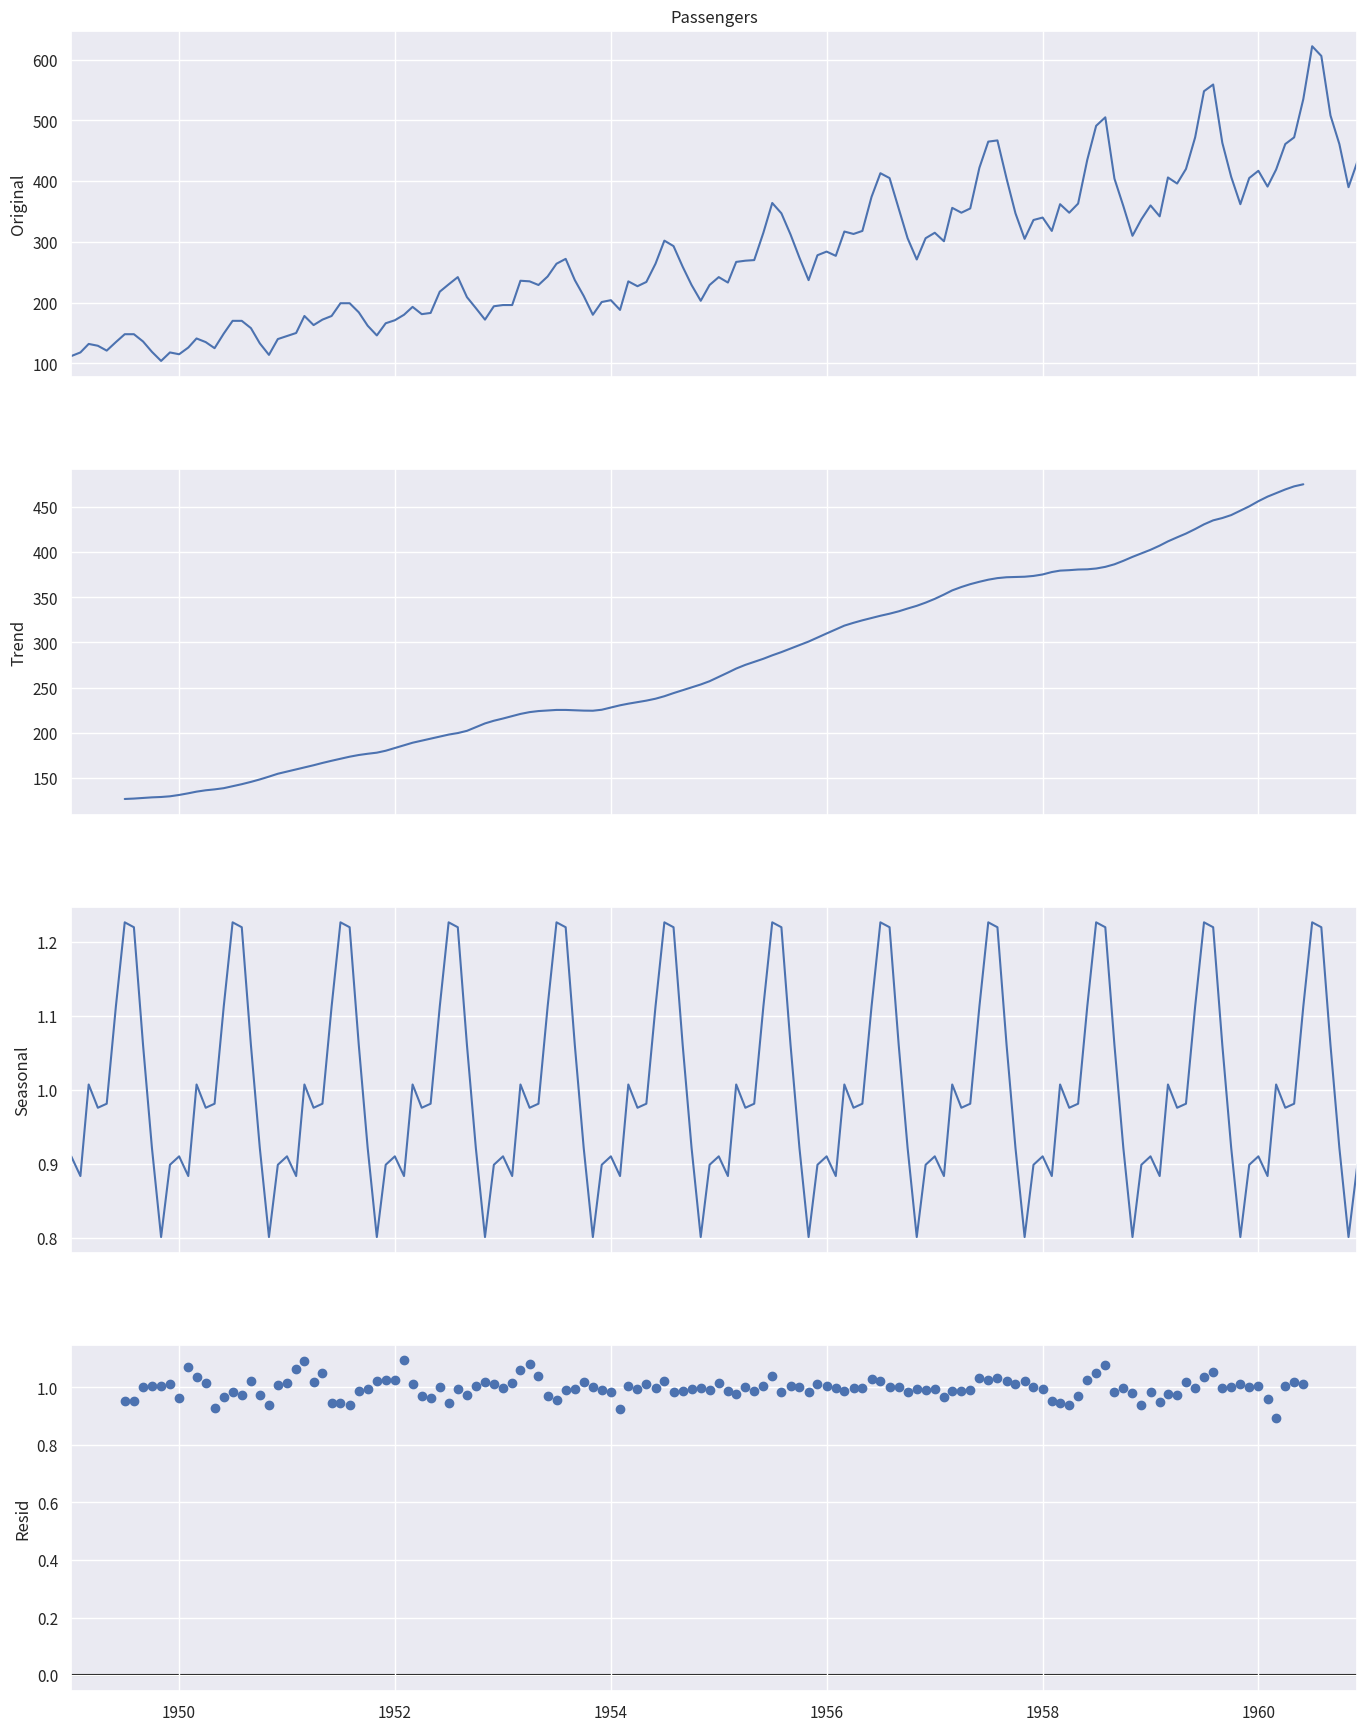

In [20]:
#전용 시각화 객체 사용
figure = sd.plot()
figure.set_size_inches(15, 20)

fig, ax1, ax2, ax3, ax4 = figure.get_children()

ax1.set_ylabel('Original')
ax1.grid(True)
ax2.grid(True)
ax3.grid(True)
ax4.grid(True)

plt.show()
plt.close()


원본 데이터를 분해 했을 때 전반적으로 증가하는 추세(Trend)를 보이고 있으며, 1년 단위로 데이터 패턴이 반복되고 있다.(Seasonal). 전체 평균은 1을 기준으로 크게 벗어나지 않는 잔차를 보이는 것으로 보아 분석 결과가 타당해 보인다.